## Prelimary Work

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("world_bank.csv")
df

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,multidimensional_poverty_headcount_ratio%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,voice_and_accountability_std,intentional_homicides
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.340,31.921,32.535,8622466.0,7898093.0,NaN,NaN,NaN
1,Afghanistan,1961-01-01,57.878356,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.443,31.349,33.068,8790140.0,8026804.0,NaN,NaN,NaN
2,Afghanistan,1962-01-01,57.955016,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.570,30.845,33.547,8969047.0,8163985.0,NaN,NaN,NaN
3,Afghanistan,1963-01-01,58.031676,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.703,30.359,34.016,9157465.0,8308019.0,NaN,NaN,NaN
4,Afghanistan,1964-01-01,58.116002,NaN,652230.0,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,50.831,29.867,34.494,9355514.0,8458694.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17267,Zimbabwe,2019-01-01,41.876696,45.213002,386850.0,657.0,6.927164,-1.271190,0.133336,46.682095,...,NaN,50.3,31.518,8.043,61.292,15354608.0,10408889.0,-1.163669,0.117815,5.145035
17268,Zimbabwe,2020-01-01,41.876696,45.093912,386850.0,657.0,5.118949,-1.287992,0.140076,52.747667,...,NaN,NaN,31.009,8.132,61.124,15669666.0,10617452.0,-1.113408,0.120230,4.977770
17269,Zimbabwe,2021-01-01,41.876696,44.974822,386850.0,NaN,NaN,-1.253550,0.151591,48.979927,...,NaN,NaN,30.537,9.057,59.253,15993524.0,10827136.0,-1.135830,0.120300,6.139985
17270,Zimbabwe,2022-01-01,NaN,NaN,NaN,NaN,NaN,-1.255139,0.151262,NaN,...,NaN,NaN,NaN,NaN,NaN,16320537.0,11033499.0,-1.102206,0.119338,NaN


In [3]:
df.nunique()


country                                        274
date                                            64
agricultural_land%                           10880
forest_land%                                  6656
land_area                                     2038
avg_precipitation                              182
trade_in_services%                            9035
control_of_corruption_estimate                4630
control_of_corruption_std                     2665
access_to_electricity%                        4327
renewvable_energy_consumption%                5413
electric_power_consumption                    7614
CO2_emisions                                  7176
other_greenhouse_emisions                     7315
population_density                           14766
inflation_annual%                             9577
real_interest_rate                            4416
risk_premium_on_lending                       2271
research_and_development_expenditure%         2815
central_goverment_debt%        

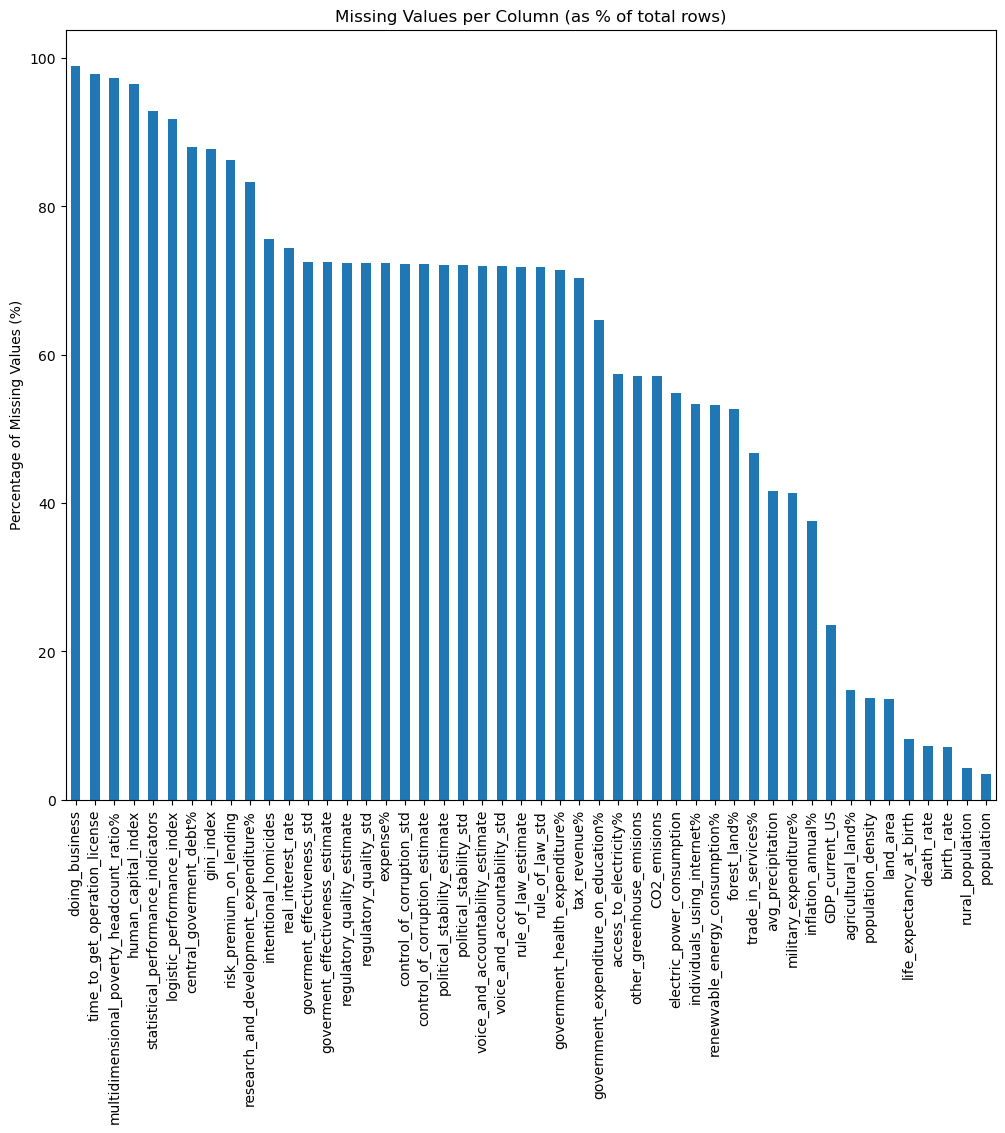

In [4]:
# Calculate percentage of missing values
total_rows = len(df)
missing_percent = df.isnull().sum() / total_rows * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot missing percentages
plt.figure(figsize=(12, 10))
missing_percent.plot(kind='bar')
plt.ylabel("Percentage of Missing Values (%)")
plt.title("Missing Values per Column (as % of total rows)")
plt.xticks(rotation=90)
plt.show()



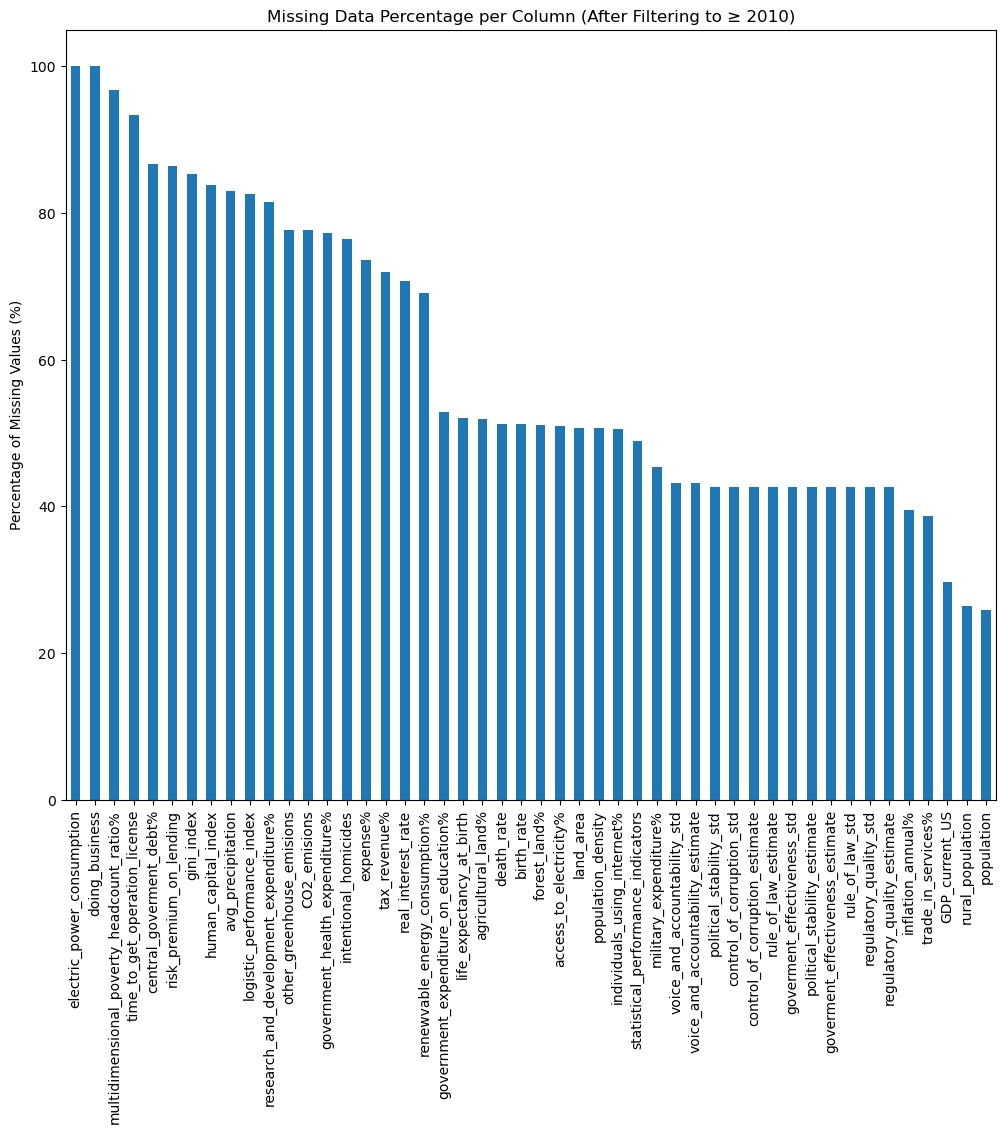

In [9]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter rows where the year is >= 2010
df = df[df['date'].dt.year >= 2010]

# Calculate percentage of missing values
total_rows = len(df)
missing_percent = df.isnull().sum() / total_rows * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot if there are missing values
if not missing_percent.empty:
    plt.figure(figsize=(12, 10))
    missing_percent.plot(kind='bar')
    plt.ylabel("Percentage of Missing Values (%)")
    plt.title("Missing Data Percentage per Column (After Filtering to ≥ 2010)")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("✅ No missing values after filtering to year ≥ 2010.")


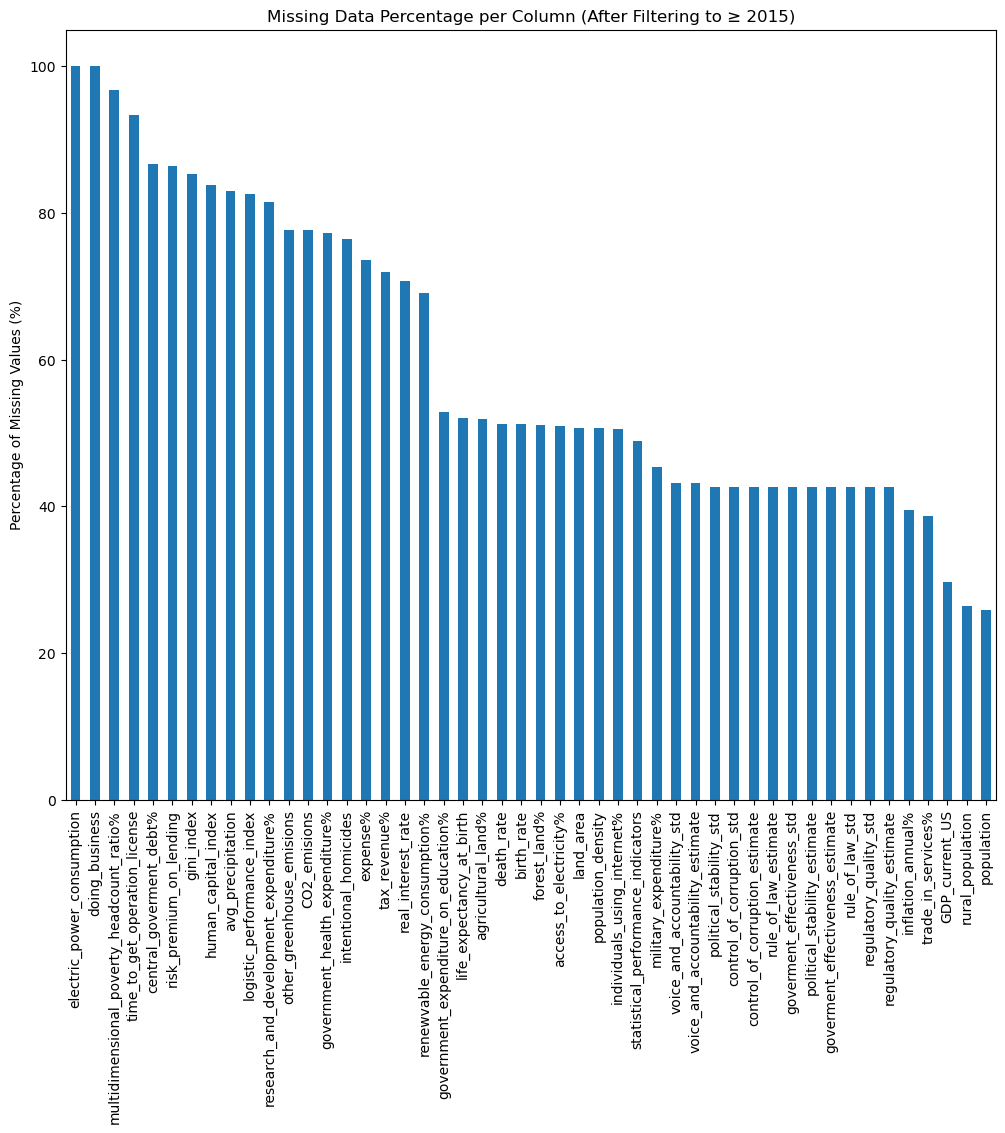

In [10]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter rows where the year is >= 2015
df = df[df['date'].dt.year >= 2015]

# Calculate percentage of missing values
total_rows = len(df)
missing_percent = df.isnull().sum() / total_rows * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot if there are missing values
if not missing_percent.empty:
    plt.figure(figsize=(12, 10))
    missing_percent.plot(kind='bar')
    plt.ylabel("Percentage of Missing Values (%)")
    plt.title("Missing Data Percentage per Column (After Filtering to ≥ 2015)")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("✅ No missing values after filtering to year ≥ 2015.")


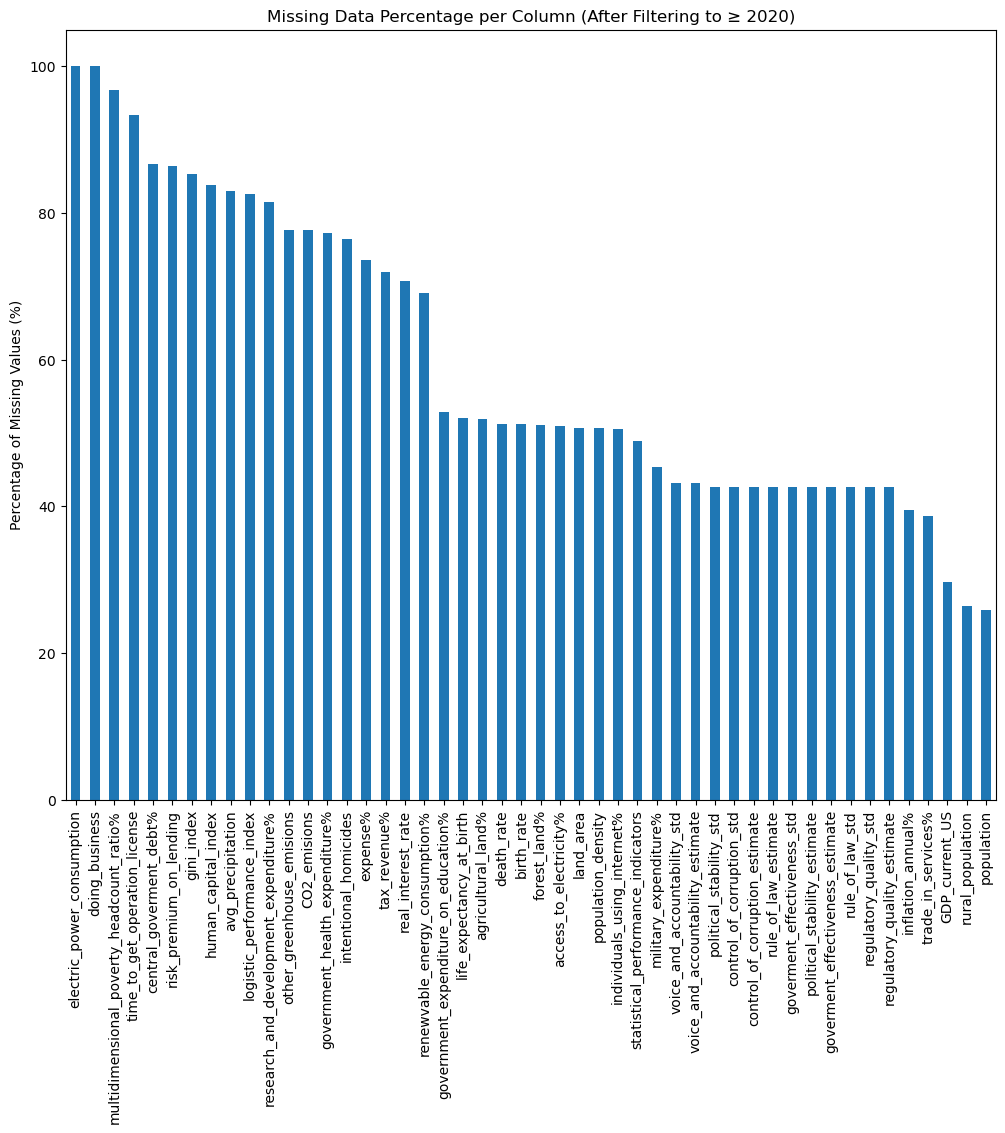

In [11]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Filter rows where the year is >= 2020
df = df[df['date'].dt.year >= 2020]

# Calculate percentage of missing values
total_rows = len(df)
missing_percent = df.isnull().sum() / total_rows * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Plot if there are missing values
if not missing_percent.empty:
    plt.figure(figsize=(12, 10))
    missing_percent.plot(kind='bar')
    plt.ylabel("Percentage of Missing Values (%)")
    plt.title("Missing Data Percentage per Column (After Filtering to ≥ 2020)")
    plt.xticks(rotation=90)
    plt.show()
else:
    print("✅ No missing values after filtering to year ≥ 2020.")
